In [1]:
%matplotlib inline

import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

plt.style.use('ggplot')

# Set path to root directory so we can access core, tasks, data, etc.
os.chdir('..')

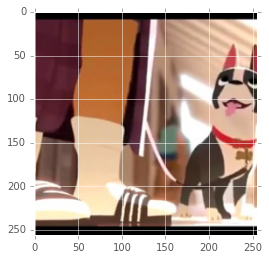

In [2]:
img = mpimg.imread('notebooks/img.jpg')
imgplot = plt.imshow(img)
plt.show()

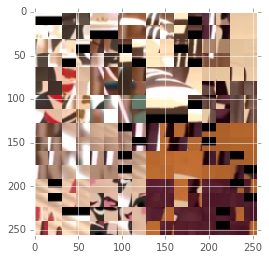

In [3]:
def scramble_img_recursively(img, min_block_size=16):
    """Return recursively scrambled copy of (2*n) x (2*n) numpy array"""
    if len(img) == min_block_size:
        return img
    else:
        copy = img.copy()
        # 4 lists - each list has 2 tuples: (y_start, y_end), (x_start, x_end)
        pixelranges = [[(0,len(img)/2),(0,len(img)/2)],
                             [(len(img)/2,len(img)),(0,len(img)/2)],
                             [(0,len(img)/2), (len(img)/2,len(img))],
                             [(len(img)/2, len(img)),(len(img)/2,len(img))]]
        
        indices = range(4)
        random.shuffle(indices)
        for i in range(4):
            idx = indices[i]
            copy[pixelranges[i][0][0]:pixelranges[i][0][1],pixelranges[i][1][0]:pixelranges[i][1][1],:] = \
                scramble_img_recursively(img[pixelranges[idx][0][0]:pixelranges[idx][0][1],pixelranges[idx][1][0]:pixelranges[idx][1][1],:],
                                        min_block_size)
        return copy
    
img_scrambled_recursively = scramble_img_recursively(img, 16)
plt.imshow(img_scrambled_recursively)
plt.show()

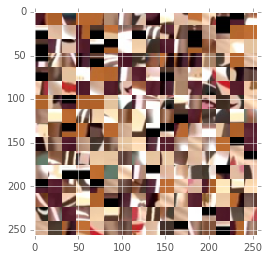

In [4]:
def scramble_img(img, block_size=16):
    """Return scrambled copy of (2*n) x (2*n) numpy array"""
    copy = img.copy()
    
    if len(img) == block_size:
        return copy
    
    num_blocks_onedim = (len(img) / block_size)
    num_blocks =  num_blocks_onedim ** 2
    
    pixelranges = []  # each sublist has 2 tuples: (y_start, y_end), (x_start, x_end)
    for i in range(num_blocks):
        y_idx = i % num_blocks_onedim
        x_idx = i / num_blocks_onedim
        y_pixelrange = (y_idx * block_size, (y_idx + 1) * block_size)
        x_pixelrange = (x_idx * block_size, (x_idx + 1) * block_size)
        pixelranges.append([y_pixelrange, x_pixelrange])
    
    indices = range(num_blocks)
    random.shuffle(indices)
    for i in range(num_blocks):
        idx = indices[i]
        copy[pixelranges[i][0][0]:pixelranges[i][0][1],pixelranges[i][1][0]:pixelranges[i][1][1],:] = \
            img[pixelranges[idx][0][0]:pixelranges[idx][0][1],pixelranges[idx][1][0]:pixelranges[idx][1][1]]
  
    return copy
    
img_scrambled = scramble_img(img, 16)
plt.imshow(img_scrambled)
plt.show()